## Performance 

<Axes: xlabel='num_tasks', ylabel='totalRouteCosts'>

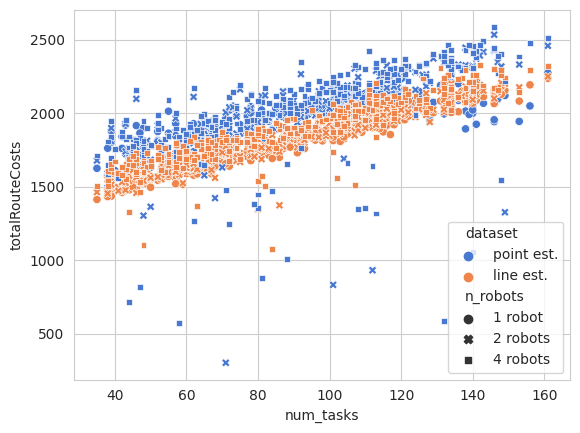

In [214]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
ours_naive = "benchmarks/ours_naive_1robots_infcapacity_AC300.csv"
ours = "benchmarks/ours_1robots_infcapacity_AC300.csv"
ours_naive_2r = "benchmarks/ours_naive_2robots_1200capacity_AC300.csv"
ours_2r = "benchmarks/ours_2robots_1200capacity_AC300.csv"
ours_naive_4r = "benchmarks/ours_naive_4robots_600capacity_AC300.csv"
ours_4r = "benchmarks/ours_4robots_600capacity_AC300.csv"
# Create an empty list to hold the dataframes
ours_naive_df = pd.read_csv(ours_naive)
ours_df = pd.read_csv(ours)
ours_naive_2r_df = pd.read_csv(ours_naive_2r)
ours_2r_df = pd.read_csv(ours_2r)
ours_naive_4r_df = pd.read_csv(ours_naive_4r)
ours_4r_df = pd.read_csv(ours_4r)

concatenated = pd.concat(
    [
        ours_naive_df.assign(dataset="point est.").assign(n_robots="1 robot"),
        ours_df.assign(dataset="line est.").assign(n_robots="1 robot"),
        ours_naive_2r_df.assign(dataset="point est.").assign(n_robots="2 robots"),
        ours_2r_df.assign(dataset="line est.").assign(n_robots="2 robots"),
        ours_naive_4r_df.assign(dataset="point est.").assign(n_robots="4 robots"),
        ours_4r_df.assign(dataset="line est.").assign(n_robots="4 robots"),
    ]
)
sns.set_palette('muted')
sns.scatterplot(data=concatenated, x="num_tasks", y="totalRouteCosts", hue="dataset", style="n_robots")



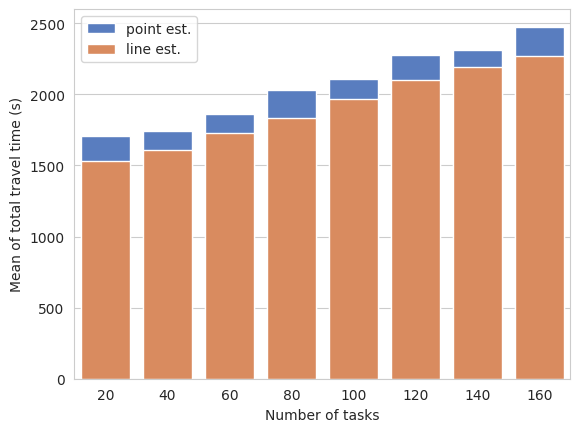

In [241]:
import pandas as pd
import matplotlib.pyplot as plt

ours_naive_df = pd.read_csv("benchmarks/ours_naive_2robots_1200capacity_AC300.csv")
ours_naive_1r_df = pd.read_csv("benchmarks/ours_naive_1robots_infcapacity_AC300.csv")
ours_naive_4r_df = pd.read_csv("benchmarks/ours_naive_4robots_600capacity_AC300.csv")
ours_df = pd.read_csv("benchmarks/ours_2robots_1200capacity_AC300.csv")
ours_1r_df = pd.read_csv("benchmarks/ours_1robots_infcapacity_AC300.csv")
ours_4r_df = pd.read_csv("benchmarks/ours_4robots_600capacity_AC300.csv")

df1 = pd.concat(
    [
        ours_df.assign(dataset="line est.").assign(n_robots="1 robot"),
        ours_df.assign(dataset="line est.").assign(n_robots="2 robots"),
        ours_4r_df.assign(dataset="line est.").assign(n_robots="4 robots"),
    ]
)

df2 = pd.concat(
    [
        ours_naive_df.assign(dataset="point est.").assign(n_robots="1 robot"),
        ours_naive_df.assign(dataset="point est.").assign(n_robots="2 robots"),
        ours_naive_4r_df.assign(dataset="point est.").assign(n_robots="4 robots"),
    ]
)

# Combine the two DataFrames into one
df = pd.concat([df1, df2], keys=['line est.', 'point est.']).reset_index()

# Divide the DataFrame into bins of size 5
bins = range(20, 199, 20)
labels = [f'{i}' for i in bins[:-1]]
df['group'] = pd.cut(df['num_tasks'], bins=bins, labels=labels)

# Create a pivot table to calculate the mean income for each age group and dataset
pivot_df = pd.pivot_table(df, values='totalRouteCosts', index='group', columns='level_0', aggfunc='mean')

# Create a stacked bar chart with error bars using seaborn

sns.barplot(x=pivot_df.index, y=pivot_df['point est.'], color=(0.2823529411764706, 0.47058823529411764, 0.8156862745098039), label='point est.')
sns.barplot(x=pivot_df.index, y=pivot_df['line est.'], color=(0.9333333333333333, 0.5215686274509804, 0.2901960784313726), label='line est.')

plt.xlabel('Number of tasks')
plt.ylabel('Mean of total travel time (s)')
plt.legend()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


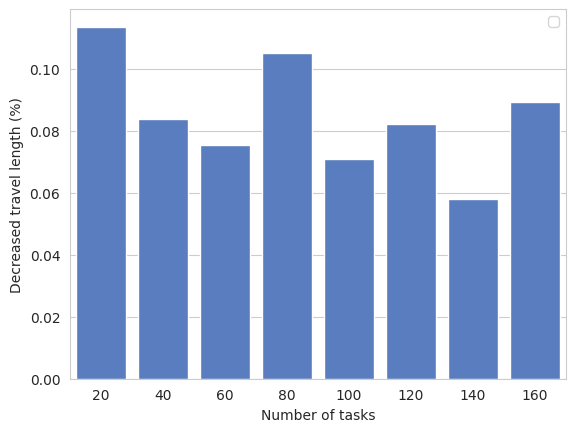

In [219]:
# Combine the two DataFrames into one
df = pd.concat([df1, df2], keys=['line est.', 'point est.']).reset_index()

# Divide the DataFrame into bins of size 5
bins = range(20, 199, 20)
labels = [f'{i}' for i in bins[:-1]]
df['group'] = pd.cut(df['num_tasks'], bins=bins, labels=labels)

# Create a pivot table to calculate the mean income for each age group and dataset
pivot_df = pd.pivot_table(df, values='totalRouteCosts', index='group', columns='level_0', aggfunc='mean')

# Create a stacked bar chart with error bars using seaborn

sns.barplot(x=pivot_df.index, y=pivot_df[['line est.', 'point est.']].pct_change(axis=1)['point est.'], color=(0.2823529411764706, 0.47058823529411764, 0.8156862745098039))
plt.xlabel('Number of tasks')
plt.ylabel('Decreased travel length (%)')
plt.legend()
plt.show()

In [230]:
sum_of_cost_ours = df1["totalRouteCosts"].sum()
sum_of_cost_naive = df2["totalRouteCosts"].sum()
performance_increase = (sum_of_cost_ours - sum_of_cost_naive) /sum_of_cost_naive * 100

print("A general performance increase of {:10.2f}% has been achieved over all number of robots".format(performance_increase))

A general performance increase of       8.57% has been achieved over all number of robots


<Axes: xlabel='num_tasks', ylabel='totalRouteCosts'>

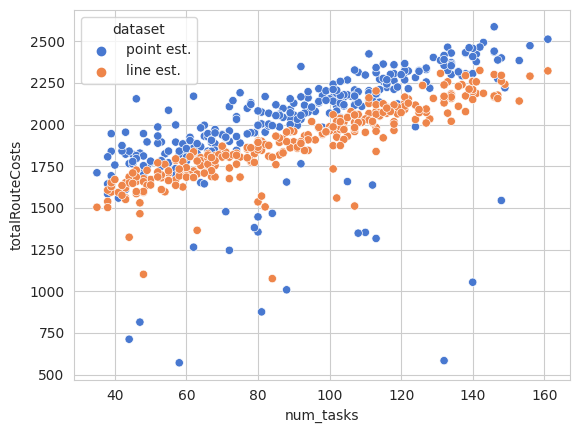

In [216]:
ours_naive = "benchmarks/ours_naive_4robots_600capacity_AC300.csv"
ours = "benchmarks/ours_4robots_600capacity_AC300.csv"

# Create an empty list to hold the dataframes
ours_naive_df = pd.read_csv(ours_naive)
ours_df = pd.read_csv(ours)

concatenated = pd.concat([ours_naive_df.assign(dataset='point est.'), ours_df.assign(dataset='line est.')])

sns.scatterplot(data=concatenated, x="num_tasks", y="totalRouteCosts", hue="dataset")

## Convergence

ours iteration mean 43.213793103448275
ours iteration std 23.96788110498982
naive iteration mean 49.549107142857146
naive iteration std 37.32955043289567


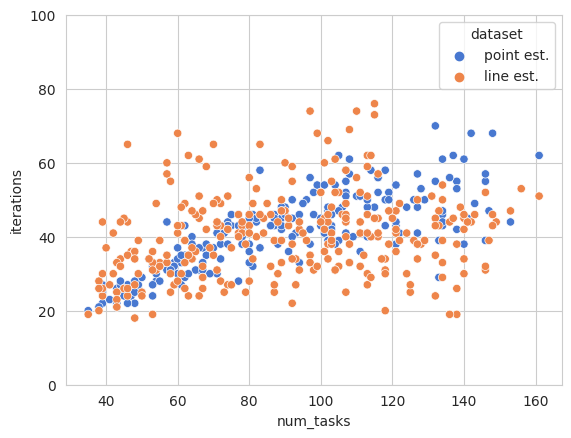

In [231]:
# ours_naive = "benchmarks/ours_naive_4robots_600capacity_AC300.csv"
# ours = "benchmarks/ours_4robots_600capacity_AC300.csv"
ours_naive = "benchmarks/ours_naive_2robots_1200capacity_AC300.csv"
ours = "benchmarks/ours_2robots_1200capacity_AC300.csv"

# Create an empty list to hold the dataframes
ours_naive_df = pd.read_csv(ours_naive)
ours_df = pd.read_csv(ours)

concatenated = pd.concat([ours_naive_df.assign(dataset='point est.'), ours_df.assign(dataset='line est.')])
sns.set_palette('muted')

plt.ylim(0, 100)
sns.scatterplot(data=concatenated, x="num_tasks", y="iterations", hue="dataset")

# Merge the two DataFrames on the 'Key' column
merged_df = pd.merge(ours_naive_df, ours_df, on='dataset_name', suffixes=('_ours', '_naive'))

print("ours iteration mean", ours_df["iterations"].mean())
print("ours iteration std", ours_df["iterations"].std())
print("naive iteration mean",ours_naive_df["iterations"].mean())
print("naive iteration std",ours_naive_df["iterations"].std())


## Computation time

<Axes: xlabel='num_tasks', ylabel='computeTime'>

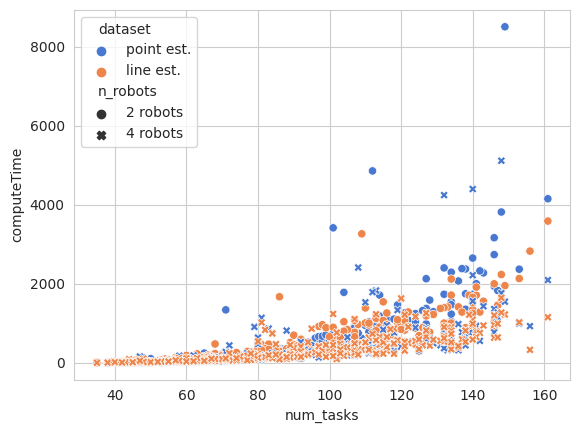

In [232]:
ours_naive = "benchmarks/ours_naive_2robots_1200capacity_AC300.csv"
ours = "benchmarks/ours_2robots_1200capacity_AC300.csv"
ours_naive_4r = "benchmarks/ours_naive_4robots_600capacity_AC300.csv"
ours_4r = "benchmarks/ours_4robots_600capacity_AC300.csv"
# Create an empty list to hold the dataframes
ours_naive_df = pd.read_csv(ours_naive)
ours_df = pd.read_csv(ours)
ours_naive_4r_df = pd.read_csv(ours_naive_4r)
ours_4r_df = pd.read_csv(ours_4r)

concatenated = pd.concat(
    [
        ours_naive_df.assign(dataset="point est.").assign(n_robots="2 robots"),
        ours_df.assign(dataset="line est.").assign(n_robots="2 robots"),
        ours_naive_4r_df.assign(dataset="point est.").assign(n_robots="4 robots"),
        ours_4r_df.assign(dataset="line est.").assign(n_robots="4 robots"),
    ]
)

sns.scatterplot(data=concatenated, x="num_tasks", y="computeTime", hue="dataset", style="n_robots")

## Iteration comparison

[Text(0.5, 0, 'Number of agents'), Text(0, 0.5, 'Number of iterations')]

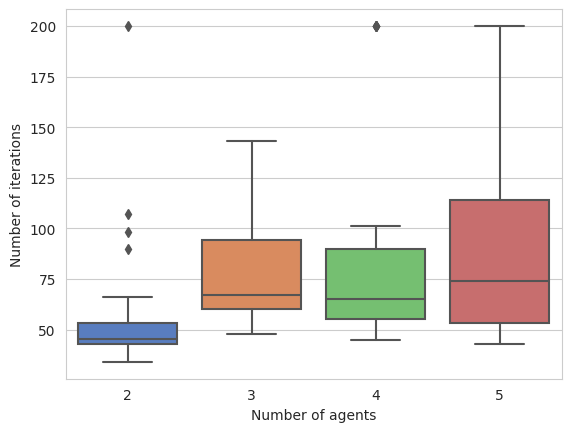

In [233]:
# TODO compare the sum of the costs of all the routes with the routes generated by agarwal
# BUT be 100% clear about the difference in colision checking
one_robot_30_samples = pd.read_csv("benchmarks/VM25/ours_1robots_1600capacity_repeat30_VM25_13.csv")
two_robot_30_samples = pd.read_csv("benchmarks/VM25/ours_2robots_1200capacity_repeat30_VM25_13.csv")
three_robot_30_samples = pd.read_csv(
    "benchmarks/VM25/ours_3robots_800capacity_repeat30_VM25_13.csv"
)
four_robot_30_samples = pd.read_csv("benchmarks/VM25/ours_4robots_480capacity_repeat30_VM25_13.csv")
five_robot_30_samples = pd.read_csv("benchmarks/VM25/ours_5robots_400capacity_repeat30_VM25_13.csv")

one_robot_30_samples[["iterations", "number_of_agents"]]
concatenated = pd.concat(
    [
        two_robot_30_samples,
        three_robot_30_samples,
        four_robot_30_samples,
        five_robot_30_samples,
    ]
)
sns.set_palette('muted')

fig = sns.boxplot(data=concatenated,x="number_of_agents", y="iterations")
fig.set(xlabel='Number of agents', ylabel='Number of iterations')
